Consider a single-degree-of-freedom spring-mass-damper system with mass $m= 500$ kg, undamped
natural circular frequency $\omega_n$ = 36 rad/s and damping ratio $\zeta$ = 0.008. The system is subjected to a
periodic force excitation $f(t)$ with period $T$ = 0.5 seconds. This force can be approximated by using
just its first four harmonics, with coefficients the following values, in kN  
$$
\begin{aligned}
F_0 &= 0 \\
F_1 &= 3+2.1j \\
F_2 & = -0.6+0.5j\\
F_3 & = 0.84-0.75j\\
F_4 & = 0.01 - 0.03j\\
\end{aligned}
$$

In [1]:
from sympy import exp,integrate, symbols, expand, plot, sin, pi, simplify,lambdify, re, Abs
import numpy as np
import matplotlib.pyplot as plt 
p, t, tau = symbols('p, t, tau',real = True)
F, m = symbols('F, m',real = True)
F0, F1, F2 ,F3, F4 = symbols('F0, F1, F2, F3, F4',real = True)
m = 500
w_n = 36
zeta = 0.008
T = 0.5
w_0 = 2 * pi / T
k = (w_n ** 2) * m
c = 2 * w_n * zeta * m
F = -1j*F* exp(1j*p*w_0*t) + 1j*F0 * exp(-1j*p*w_0*t)
print('expression of whole excitation:')
display(F)

expression of whole excitation:


-1.0*I*F*exp(4.0*I*pi*p*t) + 1.0*I*F0*exp(-4.0*I*pi*p*t)

In [69]:
F_p = {
    0: 0,
    1: (3 + 2.1j) * 1000,
    2: (-0.6 + 0.5j) * 1000,
    3: (0.84 - 0.75j) * 1000,
    4: (0.01 - 0.03j) * 1000
}

# F_{-k} = conjugate(F_k)
for p in range(1, 5):
    F_p[-p] = F_p[p].conjugate()

f_t = 0
for p in range(-4, 5):
    # F_p[p] times exp(1j * k * w_0 * t)
    f_t += F_p[p] * exp(1j * p * w_0 * t)

display(f_t) 

(3000.0 + 2100.0*I)*exp(4.0*I*pi*t) + (-600.0 + 500.0*I)*exp(8.0*I*pi*t) + (840.0 - 750.0*I)*exp(12.0*I*pi*t) + (10.0 - 30.0*I)*exp(16.0*I*pi*t) + (10.0 + 30.0*I)*exp(-16.0*I*pi*t) + (840.0 + 750.0*I)*exp(-12.0*I*pi*t) + (-600.0 - 500.0*I)*exp(-8.0*I*pi*t) + (3000.0 - 2100.0*I)*exp(-4.0*I*pi*t)

Then calculate the frequency response G($i\omega$)

In [70]:
r = symbols('r', real=True)      # r = w_0/w_n
G_i_w = 1 / (1 - r **2 + 1j * 2 * zeta * r)
print('Dimensionless Transfer Function G(i*w):')
display(G_i_w)

Dimensionless Transfer Function G(i*w):


1/(-r**2 + 0.016*I*r + 1)

Displacement excitation to force excitation
$$
\begin{aligned}
F(t) &= k f(t) \\
f(t) &= \frac{F(t)}{k} \\
X_k&= f_k \cdot G_p(\omega) \\
\end{aligned}
$$
where $\omega$ = $ip\omega_0$

In [71]:
X_p = {}
for p in range(0, 5):  # just calculate positive frequency
    if p == 0:
        f_p = F_p[0] / k
        omega_p = 0
        r_p = omega_p / w_n
        G_p = G_i_w.subs({r: r_p})
        X_p[0] = f_p * G_p
    else:
        f_p_pos = F_p[p] / k
        omega_p_pos = p * w_0
        r_p_pos = omega_p_pos / w_n
        G_p_pos = G_i_w.subs({r: r_p_pos})
        X_p[p] = f_p_pos * G_p_pos
        # just pick conjugate
        X_p[-p] = X_p[p].conjugate()

x_t = 0
for p in range(-4, 5):
    x_t += X_p[p] * exp(1j * p * w_0 * t)

x_t_numeric = x_t.evalf()


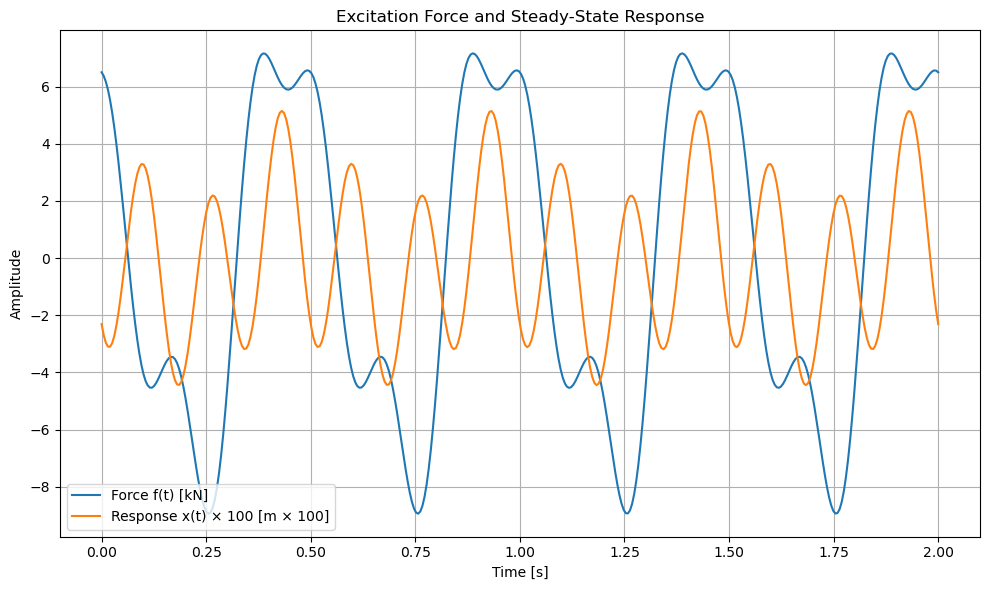

In [72]:
# Convert sympy expressions f_t and x_t into numeric functions
# print("free symbols in f_t =", f_t.free_symbols)
# print("free symbols in x_t =", x_t.free_symbols)
# print("free symbols in X_p =", {p: X_p[p].free_symbols for p in X_p})


# sympy expression -> numerical functions (real part)
f_t_func = lambdify(t, f_t, modules=['numpy'])
x_t_func = lambdify(t, x_t_numeric, modules=['numpy'])
# ---------------------------------------
# Generate time vector
# ---------------------------------------
T_period = 0.5
t_num = np.linspace(0, 4*T_period, 400)  # plot 4 periods

# compute numeric curves (take real part)
f_num = np.real(f_t_func(t_num))
x_num = np.real(x_t_func(t_num))
# ---------------------------------------
# Plotting
# ---------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(t_num, f_num / 1000, label="Force f(t) [kN]")
plt.plot(t_num, x_num * 100, label="Response x(t) × 100 [m × 100]")

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Excitation Force and Steady-State Response")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
